In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
data_path = '../meteo_data.csv'

# create pandas dataframe
df = pd.read_csv(data_path)
df

,SOLAR_RADIATION,PRECIPITATION,WIND_SPEED,LEAF_WETNESS,HC_AIR_TEMPERATURE,HC_RELATIVE_HUMIDITY,DEW_POINT,DATE
0,91.0,0.2,1.7,0.0,19.45,0.00,0.0,2018-06-17 14:00:00
1,210.0,0.4,0.6,5.0,19.87,0.00,0.0,2018-06-17 15:00:00
2,346.0,0.0,3.0,0.0,22.20,0.00,0.0,2018-06-17 16:00:00
3,222.0,0.0,1.6,0.0,23.14,0.00,0.0,2018-06-17 17:00:00
4,146.0,0.0,1.9,0.0,23.44,0.00,0.0,2018-06-17 18:00:00
...,...,...,...,...,...,...,...,...
52540,159.0,0.0,0.7,0.0,23.88,89.96,21.9,2024-06-15 09:00:00
52541,481.0,0.0,0.9,0.0,26.39,71.30,20.4,2024-06-15 10:00:00
52542,350.0,0.0,0.7,0.0,28.53,58.46,19.3,2024-06-15 11:00:00
52543,265.0,0.0,0.3,0.0,27.91,61.46,19.5,2024-06-15 12:00:00


In [19]:
# set data index as datetime column
df.index = pd.to_datetime(df['DATE'])

# filter the columns by only the required_columns
required_cols = ['SOLAR_RADIATION', 'PRECIPITATION', 'WIND_SPEED', 'LEAF_WETNESS', 'HC_AIR_TEMPERATURE', 'HC_RELATIVE_HUMIDITY', 'DEW_POINT']
df = df[required_cols]

In [20]:
df

,SOLAR_RADIATION,PRECIPITATION,WIND_SPEED,LEAF_WETNESS,HC_AIR_TEMPERATURE,HC_RELATIVE_HUMIDITY,DEW_POINT
DATE,,,,,,,
2020-06-01 15:00:00,134.0,0.0,1.8,0.0,22.67,0.0,0.0
2020-06-01 16:00:00,272.0,0.0,1.5,0.0,22.83,0.0,0.0
2020-06-01 17:00:00,132.0,0.0,0.9,0.0,22.05,0.0,0.0
2020-06-01 18:00:00,247.0,0.0,0.8,0.0,22.60,0.0,0.0
2020-06-01 19:00:00,109.0,0.0,0.4,0.0,21.92,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-31 10:00:00,380.0,0.0,0.6,0.0,21.05,0.0,0.0
2024-05-31 11:00:00,417.0,0.0,0.5,0.0,22.25,0.0,0.0
2024-05-31 12:00:00,566.0,0.0,0.4,0.0,23.89,0.0,0.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Define sequence length and features
sequence_length = 24  # Number of time steps in each sequence
num_features = len(df.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


ValueError: could not convert string to float: '2020-06-05 16:00:00'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
75/75 [==============================] - 10s 26ms/step - loss: 0.0267 - val_loss: 0.0046
Epoch 2/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0100 - val_loss: 0.0043
Epoch 3/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0087 - val_loss: 0.0041
Epoch 4/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0085 - val_loss: 0.0042
Epoch 5/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0078 - val_loss: 0.0039
Epoch 6/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0078 - val_loss: 0.0038
Epoch 7/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0074 - val_loss: 0.0037
Epoch 8/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 9/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 10/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 

In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 [==============================] - 2s 5ms/step - loss: 0.0020
Test Loss: 0.002041434170678258


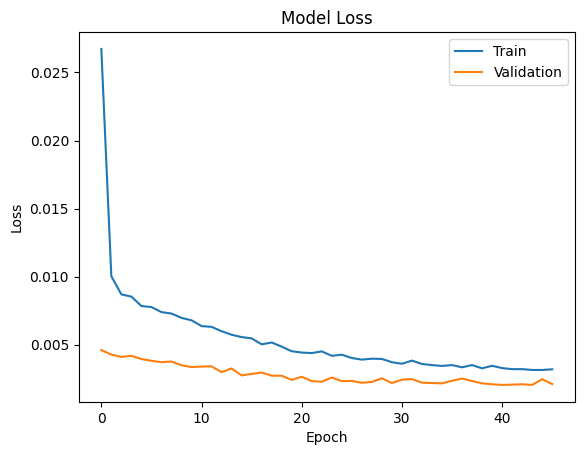

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 [==============================] - 2s 3ms/step
Mean Absolute Error (MAE): 0.03500316296363393
Mean Squared Error (MSE): 0.0020414342043969494
Root Mean Squared Error (RMSE): 0.04518223328252986


In [ ]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 [==============================] - 0s 3ms/step


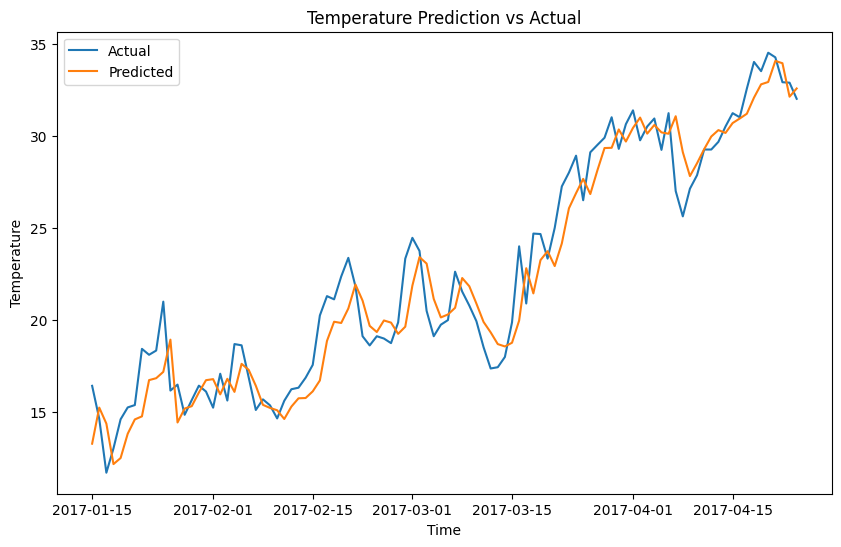

In [ ]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()